# Is Climate Change Real? How Do You Know?

In [1]:
# make imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# read datasets (disasters)
carbon_df = pd.read_csv('../input/carbon-emissions/MER_T12_06.csv')
disasters_df = pd.read_csv('../input/natural-disaster-data/number-of-natural-disaster-events.csv')
econ_df = pd.read_csv('../input/natural-disaster-data/economic-damage-from-natural-disasters.csv')

# 1: Getting a "Feel" For the Data

[Link to natural disasters dataset.](https://www.kaggle.com/dataenergy/natural-disaster-data)

In [3]:
# Look at the data for natural disasters
disasters_df.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [4]:
# drop NaN values
disasters_df = disasters_df.drop(columns='Code')
econ_df = econ_df.drop(columns='Code')

## What Kinds of Values are There for "Entity"?

In [5]:
disasters_df['Entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

## Which Years Do We Have Data For?

In [6]:
(disasters_df['Year'].min(), disasters_df['Year'].max())

(1900, 2018)

# 2: How Are the Natural Disasters Changing Over Time?
## Is Climate Change Real? 

# Stats By the Decade: Measures of Central Tendency

# How does the mean number of natural disasters change by the decade?

# Functions to Compute Mean Amount of Disasters Annually, for a Given Decade

In [7]:
def grab_decade(start_yr, y_c_data, interval=10):
    '''Return years and counts for only a specific interval length.'''
    end_yr = int(start_yr) + interval - 1
    years = y_c_data[(y_c_data['years'] <= end_yr) & (y_c_data['years'] >= start_yr)]
    return years

def compute_decade_mean(start_yr, y_c_data):
    '''Sum the number of total disasters over a given period of 10 years, returns the mean.'''
    years = grab_decade(start_yr, y_c_data)
    # compute and return the mean
    return years['counts'].sum() / 10

# Function to Perform This Step for all Decades 1900-2010

In [8]:
def compute_means(y_c_data):
    '''Returns a dict of all mean number of disasters that occurred for every decade, 1900-2010.'''
    # compute the amount of decades in our data
    start_yr, end_yr = y_c_data['years'].min(), y_c_data['years'].max()
    decades = (end_yr - start_yr) // 10
    # store all the means in a dict
    decade_means = dict()
    for i in range(start_yr, end_yr, 10):
        decade_means[f'{i}'] = compute_decade_mean(i, y_c_data)
    return decade_means

# Calling the function
ALL_DIS = 'All natural disasters'
COUNT = 'Number of reported natural disasters (reported disasters)'
counts = disasters_df[(disasters_df['Entity'] == ALL_DIS)][COUNT]  # just the counts of all natural disasters, all years
years = disasters_df[(disasters_df['Entity'] == ALL_DIS)]['Year']  # just the years
y_c_data = pd.DataFrame(data={
                        'years':years, 
                        'counts':counts})
means_by_decade = compute_means(y_c_data)

# Plot of Changing Mean of Disaster Counts, By Decade

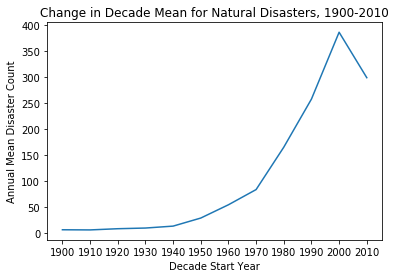

In [9]:
plt.plot(list(means_by_decade.keys()), list(means_by_decade.values()))
plt.xlabel('Decade Start Year')
plt.ylabel('Annual Mean Disaster Count')
plt.title('Change in Decade Mean for Natural Disasters, 1900-2010')
plt.show()

# How does the median number of natural disasters change by decade?¶

# Analogous Functions for the Medians By Decade

In [10]:
def compute_decade_median(start_yr, y_c_data):
    '''Return the median of total disasters over a given period of 10 years.'''
    years = grab_decade(start_yr, y_c_data)
    # compute and return the median
    return years['counts'].median()

def compute_medians(y_c_data):
    '''Returns a dict of all mean number of disasters that occurred for every decade, 1900-2010.'''
    # compute the amount of decades in our data
    start_yr, end_yr = y_c_data['years'].min(), y_c_data['years'].max()
    decades = (end_yr - start_yr) // 10
    # store all the medians in a dict
    decade_medians = dict()
    for i in range(start_yr, end_yr, 10):
        decade_medians[f'{i}'] = compute_decade_median(i, y_c_data)
    return decade_medians

medians_by_decade = compute_medians(y_c_data)

# Plot the Change in Disaster Count Median, By Decade

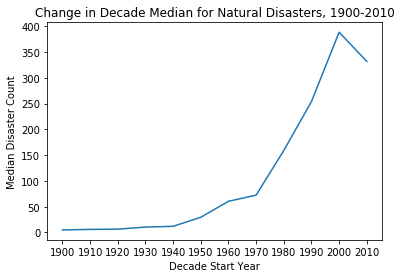

In [11]:
plt.plot(list(medians_by_decade.keys()), list(medians_by_decade.values()))
plt.xlabel('Decade Start Year')
plt.ylabel('Median Disaster Count')
plt.title('Change in Decade Median for Natural Disasters, 1900-2010')
plt.show()

# Wait, what? 
## Why the drop around 2000?

# Watch out! For people who only show you the data for the last decade, there's more if we look closely (at the annual data)!

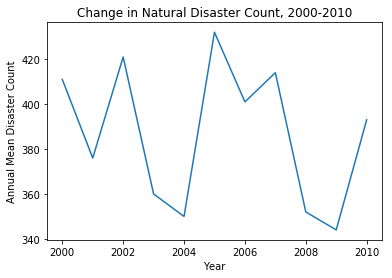

In [12]:
counts = disasters_df[(disasters_df['Entity'] == 'All natural disasters') & (disasters_df['Year'] >= 2000) & (disasters_df['Year'] <= 2010)]['Number of reported natural disasters (reported disasters)']
plt.plot(list(range(2000, 2011)), counts)
plt.xlabel('Year')
plt.ylabel('Annual Mean Disaster Count')
plt.title('Change in Natural Disaster Count, 2000-2010')
plt.show()

# Our Data is Subject to Regression to the Mean!
## How can we reach better conclusions*?
### **Without just getting more data*

# 3: Bayes' Theorem
## $ P(A|B) = \frac{P(A and B)}{P(A)} $

# Given a year is between 2000-2018, what is the chance that it's number of total disasters is greater than the average number of disasters for all years 1900-2018?

### In our scenario:

### $ P(A|B) $ = P(Year Has More Natural Disasters than the Mean for All Years 1900-2018, Given Year is 2000-2018)

### $ P(A) $ = P(Year is Between 2000-2018) 

# What is the mean number of total natural disasters annually, for all years 1900-2018?

In [13]:
# find all rows reporting "all natural disasters"
COUNT = 'Number of reported natural disasters (reported disasters)'
all_disasters = disasters_df[disasters_df['Entity'] == 'All natural disasters'][COUNT]
# sum them together, divide by their number
mean_disasters = np.sum(all_disasters) / len(all_disasters)
# print the mean
mean_disasters

111.02521008403362

# How Many Years Between 1900-2018 Have More Than This Mean?

In [14]:
count = 0
for num in all_disasters:
    if num > mean_disasters:
        count += 1
count

42

##  Do all years 2000-2018 have more total disasters than the mean?

In [15]:
all_disasters_years_and_counts = disasters_df[(disasters_df['Entity'] == 'All natural disasters')]
years_2000_2018 = all_disasters_years_and_counts.tail(19)
count = 0
for num in years_2000_2018['Number of reported natural disasters (reported disasters)']:
    if num > mean_disasters:
        count += 1
        
percent_val = round((count/19) * 100, 2)  
print(f'{percent_val}%')  # have all these years surpassed the mean we calculated?

100.0%


# So, What's the Chance that a Year has an Above Average Number of Natural Disasters, given the year is 2000-2018, than the mean of all 118 years?

In [16]:
print(f'{round((19/42) * 100, 2)}%')

45.24%


# Bayes' Theorem, pt. 2
### Do we really need to set 2000 as our checkpoint?

# Given a year is between 2000-2018, what is the chance that it's number of total disasters is greater than the average number of disasters for all years 1900-2000?

In [17]:
# slice the DataFrame by century
disasters_20th = disasters_df[(disasters_df['Entity'] == 'All natural disasters') & (disasters_df['Year'] <= 1999) & (disasters_df['Year'] >= 1900)]
disasters_21st = disasters_df[(disasters_df['Entity'] == 'All natural disasters') & (disasters_df['Year'] >= 2000) & (disasters_df['Year'] <= 2018)]

# find the mean annual number of disasters in the 20th century
mean_20th = disasters_20th[COUNT].values.mean()

# compute the percent of years in the 21st century which is greater than this value
percent_over = len(disasters_21st[disasters_21st[COUNT] > mean_20th]) / len(disasters_21st) * 100
print(f'{percent_over}%')

100.0%


# So how does the probability we're looking for, differ from the one before?

In [18]:
# find the total number of years with counts above the mean_20th
count_above_mean = len(all_disasters[all_disasters > mean_20th])
print(f'{round((18/count_above_mean) * 100, 2)}%')

37.5%


# 4: Distribution of Disasters

# What is the distribution of natural disasters over the years 1900-1999? 2000-2018?

In [19]:
# let's take another look at that data
all_disasters_years_and_counts

,Entity,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,1900,5
1,All natural disasters,1901,2
2,All natural disasters,1902,9
3,All natural disasters,1903,8
4,All natural disasters,1904,2
...,...,...,...
114,All natural disasters,2014,320
115,All natural disasters,2015,380
116,All natural disasters,2016,325
117,All natural disasters,2017,276


# Breaking it Down Even Further
## Years and Counts

In [20]:
y_c_data

,years,counts
0,1900,5
1,1901,2
2,1902,9
3,1903,8
4,1904,2
...,...,...
114,2014,320
115,2015,380
116,2016,325
117,2017,276


# Time Series Plot

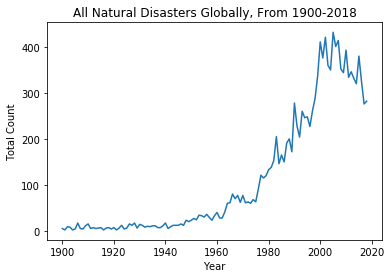

In [21]:
plt.plot(y_c_data['years'], y_c_data['counts'])
plt.title('All Natural Disasters Globally, From 1900-2018')
plt.ylabel('Total Count')
plt.xlabel('Year')
plt.show()

# Is the Distribution of Disasters "Balanced" Between the Centuries?

# What's the probability that any given natural disaster between 1900-2018, happened 1900-1999? 

In [22]:
def probability_for_interval(start_year, end_year):
    # take the sum of all natural disasters that occurred 1900-2018
    sum_all = y_c_data['counts'].sum()
    # take the sum that happen over the interval
    yrs_in_range = y_c_data[(y_c_data['years'] < end_year) & (y_c_data['years'] > start_year)]
    sum_yrs = yrs_in_range['counts'].sum()
    # return the probability
    percent = round((sum_yrs/sum_all) * 100, 2)
    return percent
    
prob_20th = probability_for_interval(1900, 2000)
print(f'{prob_20th}%')

48.12%


# What About 2000-2018?

In [23]:
prob_21st = probability_for_interval(2000, 2018)
print(f'{prob_21st}%')

46.59%


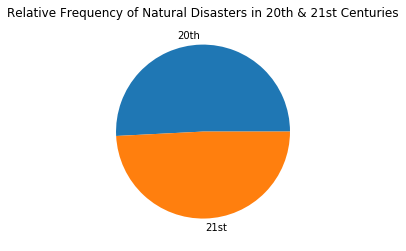

In [24]:
plt.pie([prob_20th, prob_21st], labels=['20th', '21st'])
plt.title('Relative Frequency of Natural Disasters in 20th & 21st Centuries')
plt.show()

# 5: What Happens if We Remove Outliers?

# We need* to take a lot at our IQR!

### **because we don't have a normal distribution*


In [25]:
def find_remove_outlier_iqr(disaster_counts):
    '''Remove the outliers from the dataset of annual total nautral disasters.'''
    # calculate interquartile range
    q25, q75 = np.percentile(disaster_counts, 25), np.percentile(disaster_counts, 75)
    iqr = q75 - q25
    print(f'This is the IQR: {iqr}')
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in disaster_counts if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in disaster_counts if x > lower and x < upper]
    return outliers

print(f'Number of outliers removed from the data: {len(find_remove_outlier_iqr(counts))}')

This is the IQR: 56.5
Number of outliers removed from the data: 0


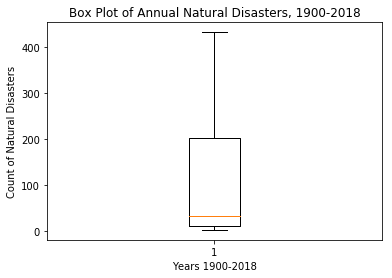

In [26]:
# show box plot
counts = all_disasters_years_and_counts['Number of reported natural disasters (reported disasters)']
plt.boxplot(counts)
plt.title("Box Plot of Annual Natural Disasters, 1900-2018")
plt.ylabel("Count of Natural Disasters")
plt.xlabel("Years 1900-2018")
plt.show()

# 6: How Has the Amount of Carbon Emissions Looked Over the Turn of the Century?

# Getting a Feel of the Carbon Emissions Data

## This provides the monthly carbon emissions from electricity generation, by the Energy Information Administration.

[Link to the dataset](https://www.kaggle.com/txtrouble/carbon-emissions).

In [27]:
carbon_df.head()
carbon_df['Description'].values

array(['Coal Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions', ...,
       'Total Energy Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'], dtype=object)

In [28]:
carbon_df.tail()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
5089,TXEIEUS,201603,115.997,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5090,TXEIEUS,201604,113.815,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5091,TXEIEUS,201605,129.44,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5092,TXEIEUS,201606,172.074,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5093,TXEIEUS,201607,201.958,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


# Plot the Change in Carbon Emissions Annually, from 1973-2016


In [29]:
# store the annual emissions count in a dict
years_emissions = dict()
# just look at emissions from total electric output
carbon_total = carbon_df[carbon_df['Description'] == 'Total Energy Electric Power Sector CO2 Emissions']
# traverse through the years
for i in range(197300, 201700, 100):
    # find all the rows in the data for the year we're currently on
    year = carbon_total[(carbon_total['YYYYMM'] >= i) & (carbon_total['YYYYMM'] <= i + 12)]
    # sum the emissisons for that one year
    sum = 0.0
    for value in year['Value']:
        # handle the invalid values
        if value == 'Not Available':
            value = 0.0
        sum += float(value)
    # store it in the dict
    years_emissions[int(i/100)] = sum
# Voila! A dict of all years and their emissions counts, 1973-2016
print(years_emissions)
# One of the things to note in this data is that NaN values were replaced 0, but this is likely far from the
# true number of emissions made that month

{1973: 1286.353, 1974: 1250.643, 1975: 1243.814, 1976: 1351.1860000000001, 1977: 1442.127, 1978: 1447.658, 1979: 1505.2470000000003, 1980: 1543.709, 1981: 1551.136, 1982: 1480.7900000000002, 1983: 1520.703, 1984: 1588.2939999999999, 1985: 1619.1449999999998, 1986: 1613.2489999999996, 1987: 1680.19, 1988: 1757.5199999999998, 1989: 1825.562, 1990: 1831.0010000000002, 1991: 1829.556, 1992: 1843.4219999999998, 1993: 1919.0849999999998, 1994: 1943.8449999999998, 1995: 1960.0349999999999, 1996: 2033.2369999999999, 1997: 2101.384, 1998: 2191.771, 1999: 2204.392, 2000: 2310.169, 2001: 2272.636, 2002: 2288.035, 2003: 2319.17, 2004: 2350.377, 2005: 2415.5270000000005, 2006: 2358.322, 2007: 2424.9139999999998, 2008: 2372.831, 2009: 2157.826, 2010: 2270.2549999999997, 2011: 2169.669, 2012: 2034.3249999999998, 2013: 2049.838, 2014: 2049.826, 2015: 1918.4820000000002, 2016: 1025.42}


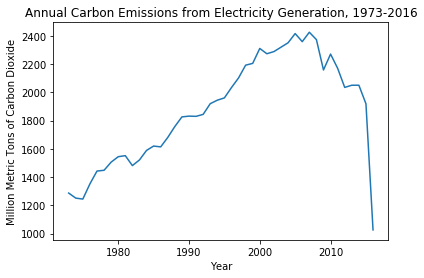

In [30]:
plt.plot(list(years_emissions.keys()), list(years_emissions.values()))
plt.title('Annual Carbon Emissions from Electricity Generation, 1973-2016')
plt.xlabel('Year')
plt.ylabel('Million Metric Tons of Carbon Dioxide')
plt.show()

# Wait, emissions are going down?
## Remember, this Data was Only for the Emissions Produced for Electricity in the U.S.!

[Globally, emissions are up](https://www.wri.org/blog/2018/12/new-global-co2-emissions-numbers-are-they-re-not-good).

# 7: The (Economic) Cost of Natural Disasters

# Getting a Feel for the Economic Data
[Link to dataset, same as for the natural disasters data.](https://www.kaggle.com/dataenergy/natural-disaster-data)

In [31]:
econ_df.head()

,Entity,Year,Total economic damage from natural disasters (US$)
0,All natural disasters,1900,30000000
1,All natural disasters,1901,0
2,All natural disasters,1902,0
3,All natural disasters,1903,480000000
4,All natural disasters,1904,0


# Let's Combine This DataFrame with the Disasters Data!

In [32]:
# combining datasets
df = disasters_df.rename(columns={'Number of reported natural disasters (reported disasters)': 'Disaster Count'})
df2 = econ_df.rename(columns={'Total economic damage from natural disasters (US$)':'Cost'})
df['Cost'] = df2['Cost']
df.head()


,Entity,Year,Disaster Count,Cost
0,All natural disasters,1900,5,30000000.0
1,All natural disasters,1901,2,0.0
2,All natural disasters,1902,9,0.0
3,All natural disasters,1903,8,480000000.0
4,All natural disasters,1904,2,0.0


# Change in Economic Cost Over Time - Is it Normal?

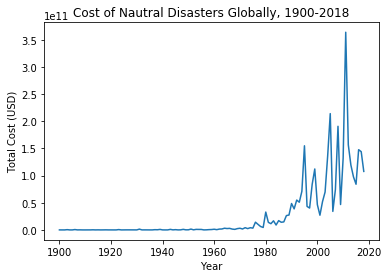

In [33]:
dollars = df[df['Entity'] == 'All natural disasters']['Cost']
plt.plot(years, dollars)
plt.title('Cost of Nautral Disasters Globally, 1900-2018')
plt.ylabel('Total Cost (USD)')
plt.xlabel('Year')
plt.show()

### Warning About the Above Time Series!
 I **do not** currently know whether or not the costs reported in the dataset are **adjusted for inflation.**

If it turns out the costs are not, we can only take the distribution with a grain of salt. **We don't really know if the disasters are costlier in terms of value, or if it's just inflation making everything more expensive over time.**

# Heatmap

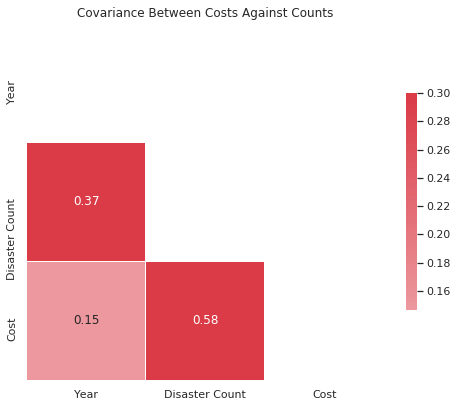

In [34]:
# Credit to the Seaborn Documentation for inspiring this cell: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Covariance Between Costs Against Counts')
plt.show()

## Correlations

In [35]:
def pearson_corr(x, y):
    '''Given two lists of numbers x and y, return the value of their Pearson correlation coefficient.'''
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)]
    den_1 = [(i - x_mean)**2 for i in x]
    den_2 = [(j - y_mean)**2 for j in y]
    correlation_x_y = np.sum(num)/np.sqrt(np.sum(den_1))/np.sqrt(np.sum(den_2))
    return correlation_x_y

# get a lists of the counts and the costs
counts = df[(df['Entity'] == 'All natural disasters') & (df['Year'] <= 2018) & (df['Year'] >= 1900)]['Disaster Count']
costs = df[(df['Entity'] == 'All natural disasters') & (df['Year'] <= 2018) & (df['Year'] >= 1900)]['Cost']
corr_cost_count = pearson_corr(costs, counts)
print(f'Correlation between cost of damages and disaster count: {corr_cost_count}.')

Correlation between cost of damages and disaster count: 0.7547597509253345.


# Null Hypothesis

### We know that both the count and cost of total natural disasters annually, rises around the turn of the century.

## Someone may claim,

# The higher mean count of total natural disasters globally in the 21st century, will not cause more expensive costs due to disasters in this century than the one prior.

## Do we accept or reject this?

# 1 Sample T-Test

**Why?**

This is 1 sample because as I'm sure you realize, Earth is the only planet like Earth for which we humans can calculate economic challenges due to natural disasters..

"The 1-sample t-test is used when we want to compare a sample mean to a population mean (which we already know)." [quote from iaingallagher blog, "t-tests in python"](https://iaingallagher.tumblr.com/post/50980987285/t-tests-in-python).

In our scenario we can already calculate the mean cost of natural disasters for all years 1900-2018, and then use the t-test to conclude whether the years in the 21st century are exceptionally high, when there were higher numbers of natural disasters (as shown earlier).


In [36]:
# 1-sample t-test
# get a list of the costs of disasters for just the 21st century
costs = df[df['Entity'] == 'All natural disasters']['Cost'].values
costs_21 = df[(df['Entity'] == 'All natural disasters') & (df['Year'] <= 2018) & (df['Year'] >= 2000)]['Cost'].values

# calculate the mean cost annually due to disasters, for whole population (1900-2018)
pop_mean = costs.mean()

# run the test
t, p = stats.ttest_1samp(costs_21, pop_mean)

# see the results
print(f"The t-statistic is {t} and the p-value is {p}.")

The t-statistic is 4.985294152328724 and the p-value is 9.584483881890286e-05.


# Summary of Findings

# 1. Rising Above (and Below) the Mean

## By the decade, the mean and median count of natural disasters rises throughout the 20th century, and have dropped (so far) during the 21st century.
## Reason why? Possibly due to regression to the mean, because truly the natural disaster counts of the 2000's decade fluctuates up and down.

# 2. Disasters in the 21st Century

## The population subset of years 2000-2018 make up:
- about 45% of all years that have above average number of total natural disasters (1900-2018)
- and approximately 37.5% of those years that have above average number of total natural disasters, compared to the annual mean of the 20th century (1900-2000).


# 3. Distribution Across Centuries
## The relative frequency of natural disasters within the first 18 years of this century, is nearly half to that of the entirety of the previous century.

# 4. Skewing Our Data?
## None of the natural diaster counts in our dataset constitute as outliers, suggesting some correlation is possible between how the counts have changed over time, with other variables.

# 5: Correlation to Carbon Emissions

## According to the data provided by the EIA, over the turn of the century the number of carbon emissions due to total electricity generation in the U.S. has decreased annually.

# 6: Correlation to Economic Damages
## Because the p-value of t-test  is less than 0.05, we can accept that as disasters go up, so will their costliness! 

## Perhaps we would already have expected this?

## The amount that inflation factors into the cost is currently unknown.

In [37]:
import pandas as pd
economic_damage_from_natural_disasters = pd.read_csv("../input/natural-disaster-data/economic-damage-from-natural-disasters.csv")
number_of_natural_disaster_events = pd.read_csv("../input/natural-disaster-data/number-of-natural-disaster-events.csv")

In [38]:
import pandas as pd
MER_T12_06 = pd.read_csv("../input/carbon-emissions/MER_T12_06.csv")